# matplotlib.pyplot

1. [Overview](#Overview)
    1. [Introduction: matplotlib and pyplot](#Introduction:-matplotlib-and-pyplot)
    1. [Importing matplotlib.pyplot](#Importing-matplotlib.pyplot)
    1. [Quick plots using the procedural interface](#Quick-plots-using-the-procedural-interface)
    1. [Using the OO interface for greater flexibility](#Using-the-OO-interface-for-greater-flexibility)
1. [Some example plots](#Some-example-plots)
    1. [Scatterplot of geographical data](#Scatterplot-of-geographical-data)
    


## Overview

### Introduction: matplotlib and pyplot

Matplotlib[1] is a popular python package for data visualisation. Developed since 2003 [R] as a way of making plots in python using a matlab like syntax. It is currently maintained and actively developed by a large community of open source developers.

Matplotlib features an object oriented interface at the base of which is the `Figure` class. A `Figure` can contain any number of subplots which are reified as objects of the `Axes` class, which contains many of the methods and fields that define the plot. 

Matplotlib.pyplot is a procedural wrapper around Matplotlib's object-oriented interface. The Matplotlib documentation recommends that, with the exception of a few functions that simplify intitialisation and saving of figures (`pyplot.figure`, `pyplot.subplot`, `pyplot.subplots`, and `pyplot.savefig`), the object oriented interface be used when programming, and the stateful pyplot interface be reserved for interactive work [R].

### Importing matplotlib.pyplot

The canonical alias for `matplotlib.pyplot` is `plt` and it is therefore imported by convention as follows:


In [1]:
# import matplotlib.pyplot and assign alias 'plt'
import matplotlib.pyplot as plt

# other imports to support remainder of this notebook
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker

`plt.subplots` returns a `Figure` object and an `Axes` object. The `Figure` object is a container for plots and the `Axes` object that is returned is the first plot in that container. `plt.sublots` takes two positional integer arguments, `nrows` and `ncols`. These parameters represent the number of subplots or `Axes` held in the `Figure` and their arrangement. The current figure can be accessed by calling `matplotlib.pyplot.gcf()` (gcf = GetCurrentFigure) and the current plot in that figure can be accessed by calling `matplotlib.pytplot.gcf().gca()` (gca = GetCurrentAxes).

### Quick plots using the procedural interface

The procedural interface is useful for producing basic plots quickly and are primarily useful for interactive work. For instance a series can be passed to plt.plot() for a quick line plot.

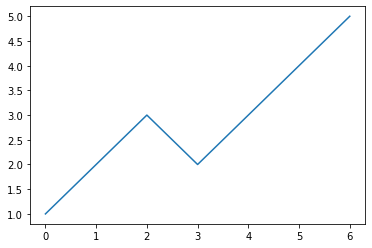

In [2]:
# A line plot in one line
plt.plot([1,2,3,2,3,4,5]);

Numerous plot types are available, for example:

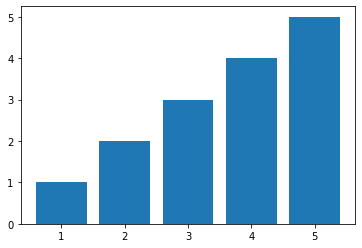

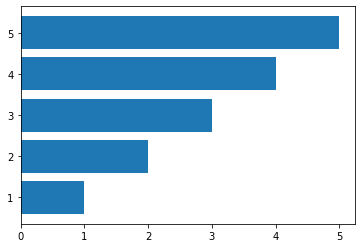

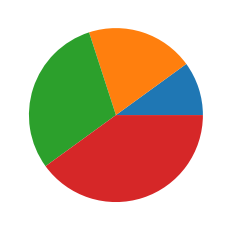

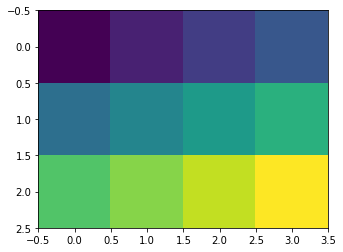

In [3]:
# Bar plot
plt.bar([1,2,3,4,5],[1,2,3,4,5])
plt.show()

# Horizontal bar plot
plt.barh([1,2,3,4,5],[1,2,3,4,5])
plt.show()

# Pie chart
plt.pie([1,2,3,4])
plt.show()

# Plot matrix as image
plt.imshow([[1,2,3,4],[5,6,7,8],[9,10,11,12]])
plt.show()

Also many statistical plots are also available. These are particularly useful when exploring new datasets:

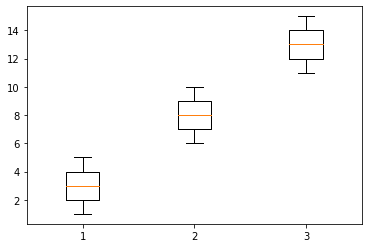

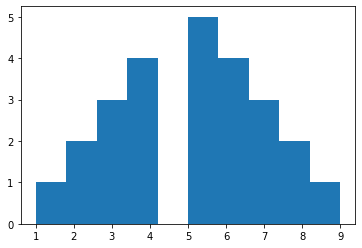

In [4]:
# Boxplot
plt.boxplot([[1,2,3,4,5],[6,7,8,9,10],[11,12,13,14,15]])
plt.show()

# Histogram
plt.hist([1,2,2,3,3,3,4,4,4,4,5,5,5,5,5,6,6,6,6,7,7,7,8,8,9])
plt.show()

A plot is displayed with plt.show(). When plt.show() is called the current plot goes out of scope but before that, after the plot has been initalised, any call to one of plt's methods will adjust or add to the current plot. For Example, below, a plot is created then axis labels and a title are added:

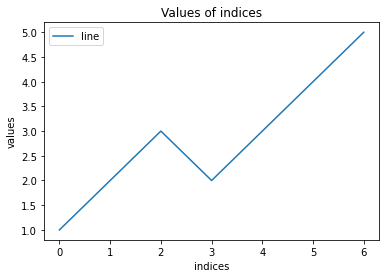

In [5]:
# A line plot with labels
# Generate the plot
plt.plot([1,2,3,2,3,4,5], label="line");

# if labels exist a legend can be created
plt.legend()

# The plot is still in scope and so can be adjusted
plt.xlabel("indices")
plt.ylabel("values")
plt.title("Values of indices")
plt.show()
# The plot is now out of scope and can no longer be adjusted
# any call to plt will start a new plot

A large range of functionality is available for generating quick plots using the pyplot procedural interface [4]. However, a much greater level of control over plot development can be achieved using the object-oriented interface.

### Using the OO interface for greater flexibility  

The pyplot OO interface allows near total control over all of the elements of the plot. It makes possible plots with multiple subplots, multiple plots in a single Axes (plot area), and multiple scales in a single plot. The usual way to create a plot when using the OO interface is `fig, ax = plt.subplots()`. `pyplot.subplots()` here returns a `Figure` object which holds all of the subplots (in this case there is only one), and which can be used to change the overall figure size among other things, and an `Axes` which is the actual plot. If there were to be two subplots the figure might be initialised using `fig, (ax1, ax2) = pyplot.subplots(1, 2)`, where the numbers passed to `subplots()` are the numbers of rows and columns of subplots in the final figure. Now the subplots can be generated by calling the desired plotting method on the Axes held in ax1 and ax2, etc. 

The plot's components are accessed via getters and setters, so the axis labels, for instance are called with something like `ax.set_xlabel("xaxis")`. Below, a figure with two subplots is created:

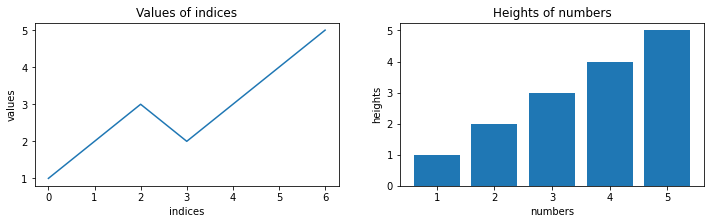

In [6]:
# Create a Figure with 2 Axes arranged in a single row
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(12,3)

# the first Axes will hold a line plot...
ax1.plot([1,2,3,2,3,4,5]);
# ...and the scond will hold a bar plot
ax2.bar([1,2,3,4,5],[1,2,3,4,5])

#Set the axis labels and titles for each Axes
ax1.set_xlabel("indices")
ax2.set_xlabel("numbers")
ax1.set_ylabel("values")
ax2.set_ylabel("heights")
ax1.set_title("Values of indices")
ax2.set_title("Heights of numbers")

plt.show()


## Some example plots


### 1. Scatterplot of geographical data

This plot was inspired by an example using a *California Housing Prices* dataset found in the book *Hands-on Learning with Scikit-Learn, Keras & TensorFlow*[5]. The idea is to plot a point dataset with a location, i.e. with coordinate attributes, and to plot a sctter plot using the geographical coordinates as *x* and *y* and displaying variations in other values using colour and symbol size. In order to prepare a dataset for this plot, a [shapefile](https://desktop.arcgis.com/en/arcmap/10.3/manage-data/shapefiles/what-is-a-shapefile.htm) [6] of Irelands [electoral divisions](https://census.cso.ie/censusasp/saps/boundaries/eds_bound.htm) [7] was downloaded from the CSO website and the centroids extracted using [QuantumGIS](https://www.qgis.org/en/site/) [8]. Small area population statistics - a CSO census derived data product containing demographic statistics at the electoral division level - were downloaded as csv files and loaded into pandas dataframes where the total population for each of those years was extracted and joined to the centroid dataset using the electoral division ID as a key. Finally, the data was plotted as a scatterplot with each datapoint represented by a circle, the size of which was determined by the absoluted change in population in that ED between 2011 and 2016, and the colour showed whether the population had falen or risen.

Note that the procedural pyplot interface is used during development of plot but the final plot is produced using the OO interface.

In [8]:
# Read ED centroid data into pandas dataframe
eds = pd.read_csv('data/ed_centroids.csv')
eds.head()

,X,Y,NUTS1,NUTS1NAME,NUTS2,NUTS2NAME,NUTS3,NUTS3NAME,COUNTY,COUNTYNAME,CSOED,OSIED,EDNAME,LAND_AREA,TOTAL_AREA
0,236368.456056,286670.682399,IE0,Ireland,IE01,"Border,Midland and Western",IE011,Border,32,Cavan County,32090,027053,Kilcogy,17.793398,17.838415
1,296984.205766,180513.893740,IE0,Ireland,IE02,Southern and Eastern,IE024,South-East (IE),1,Carlow County,01004,017022,Hacketstown,22.068904,22.068904
2,292582.032469,178524.343479,IE0,Ireland,IE02,Southern and Eastern,IE024,South-East (IE),1,Carlow County,01005,017023,Haroldstown,11.543112,11.543112
3,284014.641367,180190.200539,IE0,Ireland,IE02,Southern and Eastern,IE024,South-East (IE),1,Carlow County,01006,017029,Kineagh,18.033035,18.033035
4,286425.977882,183194.215360,IE0,Ireland,IE02,Southern and Eastern,IE024,South-East (IE),1,Carlow County,01007,017038,Rahill,16.431779,16.431779


In [9]:
# Rename ED ID column to make it easier to join with other data
eds['ID'] = eds['CSOED']
# Set the dataframe index to be the ED ID column
eds.set_index('ID', inplace=True)
# Cull unnecessary columns
eds = eds[['X', 'Y', 'COUNTYNAME', 'LAND_AREA']]
# Check the data
eds.head()

,X,Y,COUNTYNAME,LAND_AREA
ID,,,,
32090,236368.456056,286670.682399,Cavan County,17.793398
01004,296984.205766,180513.893740,Carlow County,22.068904
01005,292582.032469,178524.343479,Carlow County,11.543112
01006,284014.641367,180190.200539,Carlow County,18.033035
01007,286425.977882,183194.215360,Carlow County,16.431779


Get data to join with ED centroids for scatterplot. Small Area Population Statistics from CSO website [R]

In [10]:
# 2016 SAPS
saps2016_url = 'https://www.cso.ie/en/media/csoie/census/census2016/census2016boundaryfiles/SAPS2016_ED3409.csv'

# 2016 Key
# https://www.cso.ie/en/media/csoie/census/census2016/census2016boundaryfiles/SAPS_2016_Glossary.xlsx

# 2011 SAPS
saps2011_url = 'https://www.cso.ie/en/media/csoie/census/documents/saps2011files/AllThemesTablesED.csv'

# 2011 Key
# https://www.cso.ie/en/media/csoie/census/documents/saps2011files/Theme,breakdown.xlsx

2016 SAPS csv file has an unusual encoding and produces errors when importing using pandas.read_csv(). This is avoided by specifying the encoding (cp1252) [R]. For the purposes of the present demonstration the statistic of interest is total population per ED. The correct column ('T1_1AGETT') is identified using the key linked to above [R]. The file also imports numeric columns as dtype('object') and inserts commas as thousand separators. This is corrected using `pandas.to_numeric` and `pandas.Series.str.replace()` [R]. The correctly formatted data is stored in a new column `Pop2016`.

In [11]:
# Download 2016 SAPS data at ED level and extract ID column and Total Population column
saps2016 = pd.read_csv(saps2016_url, encoding='cp1252', usecols=['GEOGID', 'T1_1AGETT'])
# Remove commas and cast Total Population column to numeric dtype. 
saps2016['Pop2016'] = pd.to_numeric(saps2016['T1_1AGETT'].str.replace(',', ''))
# Rename GEOGID column to ID and remove ED3409_ prefix
saps2016['ID'] = saps2016['GEOGID'].str.replace("ED3409_", "")
# Make ED ID column the index
saps2016.set_index('ID', inplace=True)
# Drop unneeded columns
saps2016 = saps2016.drop(['GEOGID', 'T1_1AGETT'], axis=1)
saps2016.head()


,Pop2016
ID,
01001,4560
01002,1405
01003,526
01004,1117
01005,296


In [12]:
# Download and clean up 2011 SAPS data
saps2011 = pd.read_csv(saps2011_url, usecols=['GEOGID', 'T1_1AGETT'])
saps2011['ID'] = saps2011['GEOGID'].str.replace('E', '')
saps2011.set_index('ID', inplace=True)
saps2011 = saps2011.drop(['GEOGID'], axis=1)
saps2011.rename(columns={'T1_1AGETT':'Pop2011'}, inplace=True)
saps2011.head()


,Pop2011
ID,
01001,4181
01002,1272
01003,560
01004,1091
01005,259


In [13]:
# Join the 2011 and 2016 population dataframes with ED centroids
pop = saps2016.join(saps2011.join(eds))
# Calculate population change between the two periods
pop['Pop Change'] = pop['Pop2016'] - pop['Pop2011']
# Create boolean column for whether the population change is positive or negative
pop['Up'] = pop['Pop Change'] > 0
# Calculate the percentage change
pop['Percent Change'] = (pop['Pop Change'] / pop['Pop2011']) * 100
pop.head()

,Pop2016,Pop2011,X,Y,COUNTYNAME,LAND_AREA,Pop Change,Up,Percent Change
ID,,,,,,,,,
01001,4560,4181,272309.810746,176747.582960,Carlow County,1.807095,379,True,9.064817
01002,1405,1272,271535.112431,176812.764683,Carlow County,0.475506,133,True,10.455975
01003,526,560,295660.775229,176254.594475,Carlow County,28.136881,-34,False,-6.071429
01004,1117,1091,296984.205766,180513.893740,Carlow County,22.068904,26,True,2.383135
01005,296,259,292582.032469,178524.343479,Carlow County,11.543112,37,True,14.285714


Note the use of the procedural interface below. It is ideal for quickly producing plots while making adjustments.

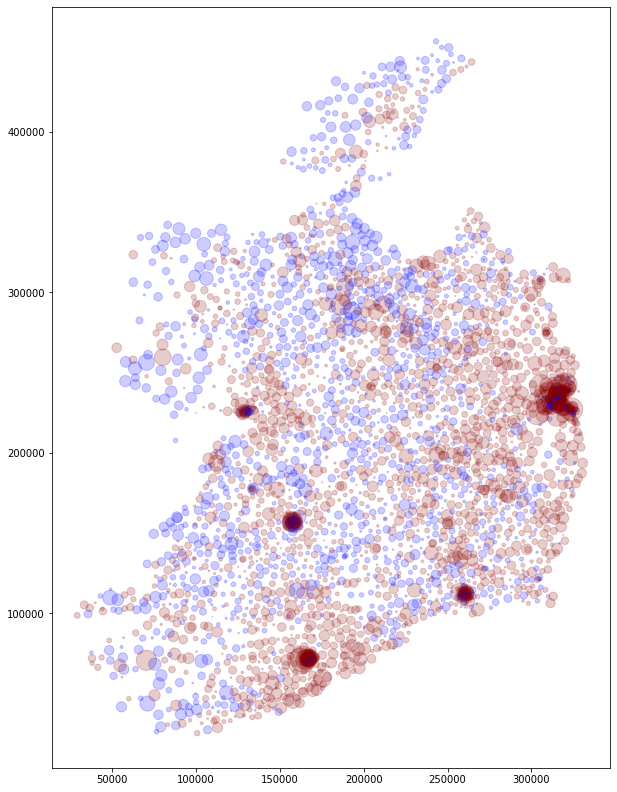

In [14]:
# Create scatterplot with long and lat values of centroids on X and Y axes
# and direction of pop change as colour 
# and size of symbol as size of pop change
plt.figure(figsize=(10, 14))
plt.scatter(x=pop['X'], y=pop['Y'], alpha=0.2, c=np.where(pop['Up'], 'darkred', 'blue'), s=abs(pop['Percent Change'] * 10))
plt.show()

There's a lot of confusion in high density areas with many small EDs, i.e. in the urban centres of Dublin, Cork, Limerick, Galway, and Waterford. Changing the drawing order might help to remedy that. The drawing order can be changed simply by changing the order of values in the DataFrame.

In [15]:
# Sort the dataframe by percent pop change
sorted_pop = pop.sort_values(by='Percent Change', key=abs, ascending=False)
sorted_pop.head()

,Pop2016,Pop2011,X,Y,COUNTYNAME,LAND_AREA,Pop Change,Up,Percent Change
ID,,,,,,,,,
18078,364,217,162593.506203,69924.028146,Cork County,1.381605,147,True,67.741935
17006,2223,1326,164065.756407,71164.975483,Cork City,1.579302,897,True,67.647059
04005,3113,1966,320062.137892,242239.885538,Fingal,10.378176,1147,True,58.341811
04015,3257,2112,305723.025825,241432.087409,Fingal,3.929437,1145,True,54.214015
05049,2886,1884,323703.272575,227091.949056,Dún Laoghaire-Rathdown,0.611499,1002,True,53.184713


The population DataFrame is now sorted by absolute population change so the largest symbols will be drawn first and the smaller ones later. This gives a better idea of what's going on in dense areas. Again, note the use of the procedural interface.

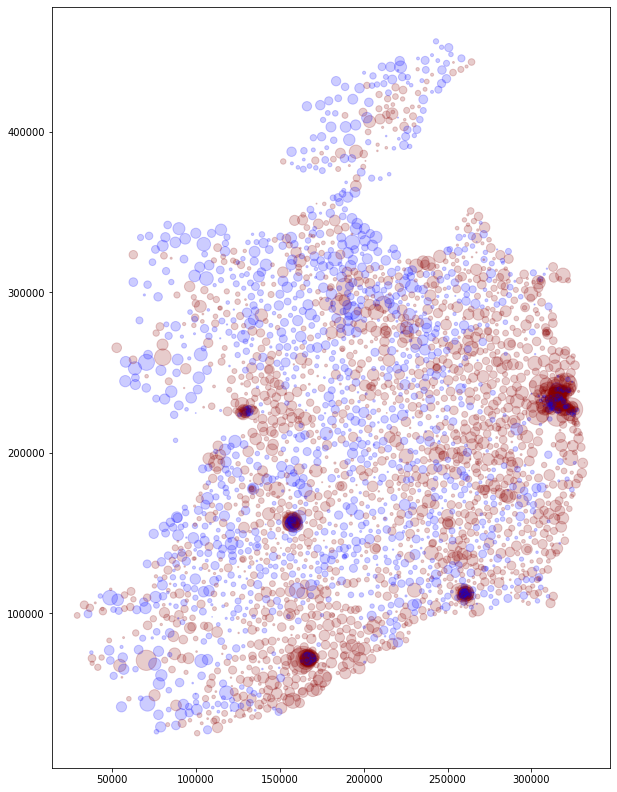

In [16]:
#fig, ax = plt.subplots()
plt.figure(figsize=(10, 14))
plt.scatter(x=sorted_pop['X'], y=sorted_pop['Y'], alpha=0.2, c=np.where(sorted_pop['Up'], 'darkred', 'blue'), s=abs(sorted_pop['Percent Change'] * 10))
plt.show()

So far the plots are showing percent population change. It would be interesting to see absolute change. Here, a figure with two Axes is produced using the object-oriented pyplot interface:

In [26]:
pop

,Pop2016,Pop2011,X,Y,COUNTYNAME,LAND_AREA,Pop Change,Up,Percent Change
ID,,,,,,,,,
01001,4560,4181,272309.810746,176747.582960,Carlow County,1.807095,379,True,9.064817
01002,1405,1272,271535.112431,176812.764683,Carlow County,0.475506,133,True,10.455975
01003,526,560,295660.775229,176254.594475,Carlow County,28.136881,-34,False,-6.071429
01004,1117,1091,296984.205766,180513.893740,Carlow County,22.068904,26,True,2.383135
01005,296,259,292582.032469,178524.343479,Carlow County,11.543112,37,True,14.285714
...,...,...,...,...,...,...,...,...,...
34066,220,219,262070.283961,348330.655482,Monaghan County,13.600876,1,True,0.456621
34067,657,648,255727.247759,340024.677617,Monaghan County,36.185325,9,True,1.388889
34068,922,871,262226.700456,339445.515326,Monaghan County,22.560034,51,True,5.855339


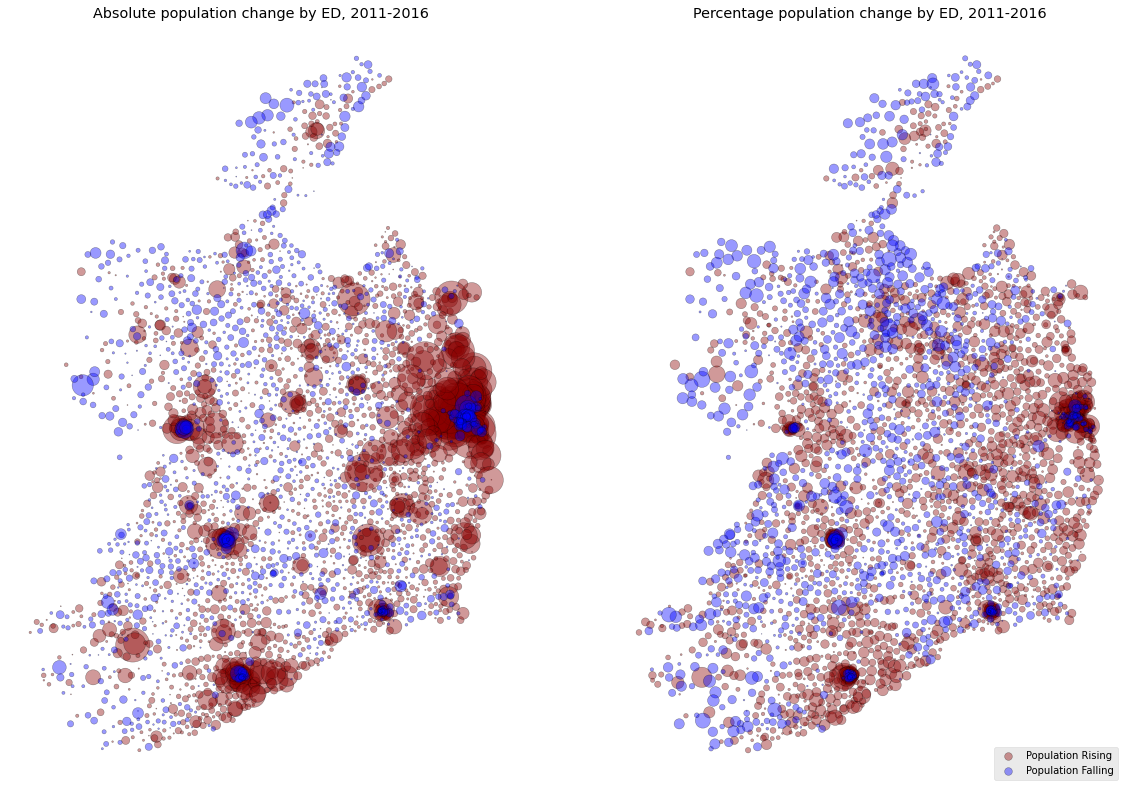

In [27]:
# Set the figure size
plt.rcParams["figure.figsize"] = [20,14]

# Two plots on one row
fig, (ax1, ax2) = plt.subplots(1, 2)

# Plot the rising an falling points separately so they can be styled differently
for rising in [True, False]:
    
    # For the legend
    label = "Population Rising" if rising else "Population Falling"
    colour = 'darkred' if rising else 'blue'
    
    # Collect long and lat of the points to be plotted
    x = pop[pop['Up'] == rising]['X']
    y = pop[pop['Up'] == rising]['Y']
    
    # Circle size
    scale1 = abs(pop[pop['Up'] == rising]['Pop Change'])
    # Percent Change circle size is exagerated to make differences easier to see
    scale2 = abs(pop[pop['Up'] == rising]['Percent Change'] * 10)
    
    # The plots
    ax1.scatter(x=x, y=y, c=colour, s=scale1, label=label,
               alpha=0.4, edgecolors='black')
    ax2.scatter(x=x, y=y, c=colour, s=scale2, label=label,
               alpha=0.4, edgecolors='black')

    # Remove the axes
    ax1.axis('off')
    ax2.axis('off')

    # Set the titles
    ax1.set_title('Absolute population change by ED, 2011-2016')
    ax2.set_title('Percentage population change by ED, 2011-2016')

    
# The subplots can share a legend
lgd = ax2.legend(loc='lower right')

# Set legend symbol sizes: https://stackoverflow.com/a/43578952
for handle in lgd.legendHandles:
    handle.set_sizes([60])

plt.show()

It's a little difficult to see what's happening in the cities. Here the counties that make up Dublin city are used to subset just that part of the dataset.

In [18]:
dublin_city = ['Dublin City', 'South Dublin', 'Fingal', 'Dún Laoghaire-Rathdown', ]
pop_dub = pop[pop['COUNTYNAME'].isin(dublin_city)]
pop_dub.head()

,Pop2016,Pop2011,X,Y,COUNTYNAME,LAND_AREA,Pop Change,Up,Percent Change
ID,,,,,,,,,
02001,1785,1555,314954.359900,235626.342740,Dublin City,0.153259,230,True,14.790997
02002,4166,3861,314583.969417,235181.362417,Dublin City,0.759390,305,True,7.899508
02003,4471,4170,314460.904380,234451.153668,Dublin City,0.361038,301,True,7.218225
02004,3109,3218,313749.570639,234765.809471,Dublin City,0.345295,-109,False,-3.387197
02005,3293,3037,314053.246964,235028.010188,Dublin City,0.264512,256,True,8.429371


The cities can then be plotted separately.

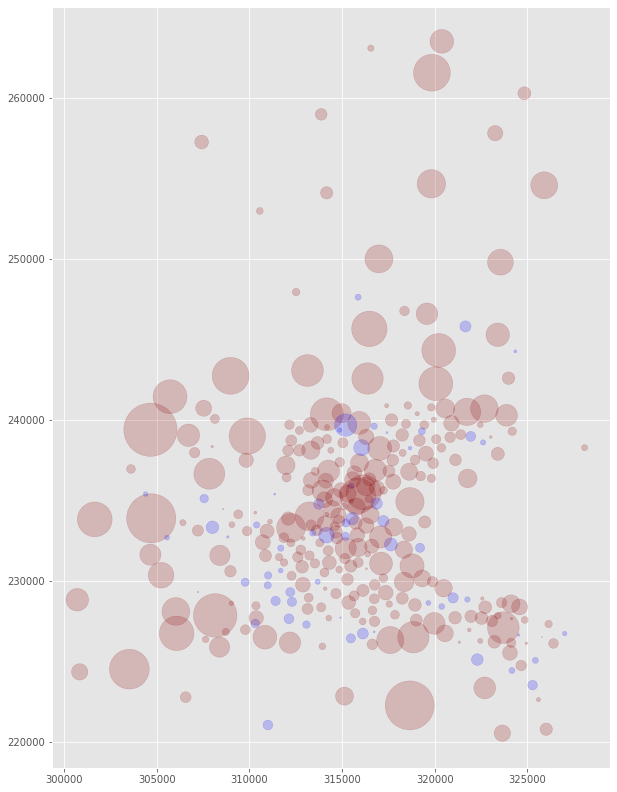

In [29]:
plt.figure(figsize=(10, 14))
plt.scatter(x=pop_dub['X'], y=pop_dub['Y'], alpha=0.2, c=np.where(pop_dub['Up'], 'darkred', 'blue'), s=abs(pop_dub['Pop Change']))
plt.show()

### 2. Population pyramid

In [227]:
# URL of SAPS at province level
prov_url = 'https://www.cso.ie/en/media/csoie/census/census2016/census2016boundaryfiles/SAPS2016_PROV.csv'

# Age by gender columns
y_cols = []
a_cols = []
# Generate lists of wanted column names
for g in 'M', 'F':
    # Young peoples' data needs extra processing so keep it separate for now
    # young people columns
    y_cols += [['T1_1AGE' + str(i) + g for i in range(20)]]
    # adult columns
    a_cols += [['T1_1AGE' + str(i) + '_' + str(i + 4) + g for i in range(20, 81, 5)] + ['T1_1AGEGE_85' + g]]

# Read the data into 2 lists of dataframes
y_data = []
a_data = []
for col in range(2):
    y_data += [pd.read_csv(prov_url, encoding='cp1252', usecols=y_cols[col], thousands=',', dtype=np.int32)]
    a_data += [pd.read_csv(prov_url, encoding='cp1252', usecols=a_cols[col], thousands=',', dtype=np.int32)]

# Aggregate the youth data so it is grouped the same as the adult data
g = ['M', 'F']
for i in range(2):
    for j in range(0, 20, 5):
        y_data[i]['T1_1AGE' + str(j) + '_' + str(j + 4) + g[i]] = y_data[i].iloc[:,j:j+5].sum(axis=1)
    y_data[i] = y_data[i].iloc[:,-4:]

# Create final separate male and female DataFrames
males = pd.concat([y_data[0], a_data[0]], axis=1)
females = pd.concat([y_data[1], a_data[1]], axis=1)


In [228]:
females

,T1_1AGE0_4F,T1_1AGE5_9F,T1_1AGE10_14F,T1_1AGE15_19F,T1_1AGE20_24F,T1_1AGE25_29F,T1_1AGE30_34F,T1_1AGE35_39F,T1_1AGE40_44F,T1_1AGE45_49F,T1_1AGE50_54F,T1_1AGE55_59F,T1_1AGE60_64F,T1_1AGE65_69F,T1_1AGE70_74F,T1_1AGE75_79F,T1_1AGE80_84F,T1_1AGEGE_85F
0,91307,96850,85339,80138,78974,93435,112143,114812,101626,89924,82136,72386,62742,54663,42711,31879,23441,22377
1,42235,46109,41932,40792,35435,36072,46895,50946,47392,44175,42017,37929,34090,30860,24284,17755,13377,12551
2,17945,19588,18306,17282,14743,14744,19489,21218,20271,18838,17927,17158,15554,13645,10379,7708,5955,6422
3,10297,11544,10521,9696,6900,7962,10269,11400,10689,10349,9643,8771,7772,7107,5397,4008,3068,3143


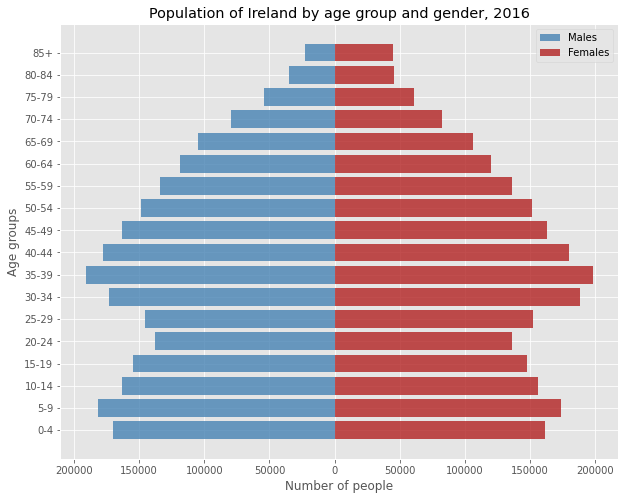

In [229]:
# Generate labels
labels = [l.partition("T1_1AGE")[2].partition("M")[0].replace('_','-').replace('GE-', '') for l in males.columns]
labels[-1] += '+'

plt.rcParams["figure.figsize"] = [10,8]
with plt.style.context('ggplot'):

    fig, ax = plt.subplots()


    # add the males data to the plot, 
    # negated so it stretches from the y-axis to the left
    ax.barh(labels, -males.sum(), color='steelblue', alpha=0.8, label='Males')
    # add the females data
    ax.barh(labels, females.sum(), color='firebrick', alpha=0.8, label='Females')

    # 
    
    # Format xtick labels so that males dont have negative values
    # see https://stackoverflow.com/a/51087117
    @ticker.FuncFormatter
    def major_formatter(x, pos):
        label = str(int(-x)) if x < 0 else str(int(x))
        return label

    ax.xaxis.set_major_formatter(major_formatter)

    ax.set_xlabel('Number of people')
    ax.set_ylabel('Age group')
    ax.set_title('Population of Ireland by age group and gender, 2016')
    

    ax.legend()

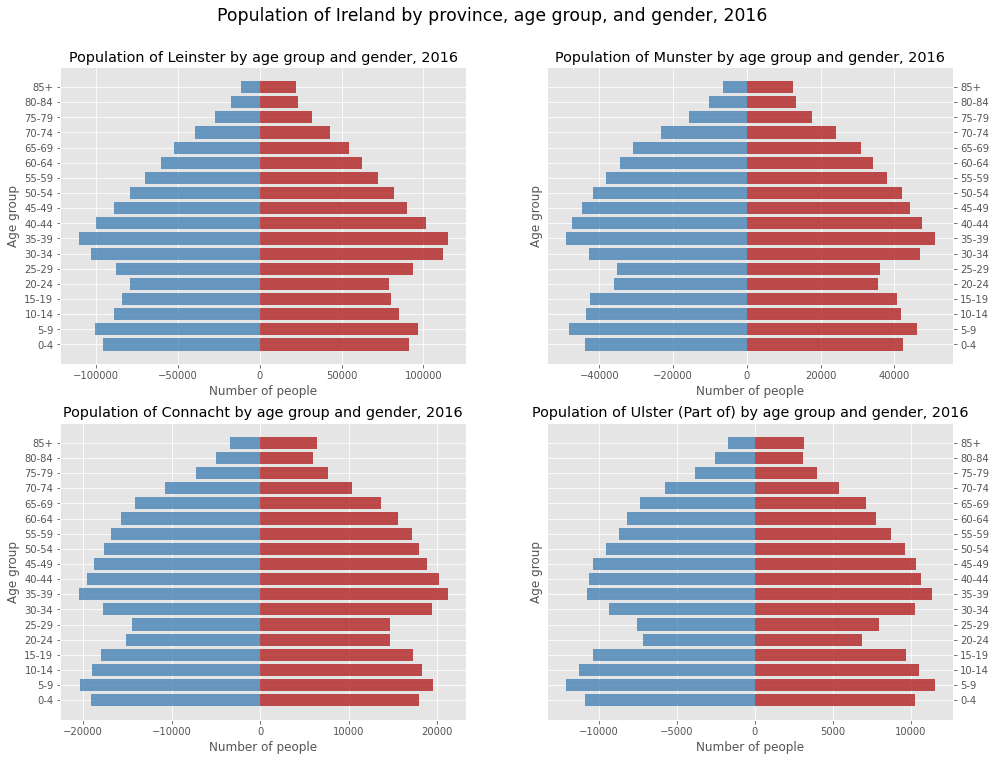

In [243]:
provinces = ['Leinster', 'Munster', 'Connacht', 'Ulster (Part of)']

plt.rcParams["figure.figsize"] = [16,12]
with plt.style.context('ggplot'):

    fig, axs = plt.subplots(2,2)

    for i, ax in enumerate(axs.ravel()):

        males_prov = males.iloc[i,:]
        females_prov = females.iloc[i,:]

        ax.barh(labels, -males_prov, color='steelblue', alpha=0.8, label='Males')
        ax.barh(labels, females_prov, color='firebrick', alpha=0.8, label='Females')

        ax.set_xlabel('Number of people')
        ax.set_ylabel('Age group')
        ax.set_title(f"Population of {provinces[i]} by age group and gender, 2016")

    plt.suptitle("Population of Ireland by province, age group, and gender, 2016", y=0.95, fontsize='xx-large')
    plt.show()

### 3. Bubble plot using geographic data

***

## References

[1] Matplotlib Development Team. (2021). Matplotlib: Visualization with Python. [online] Available from: <https://matplotlib.org/> Accessed: 28th September, 2021

[3] Matplotlib module docstring

[4] https://matplotlib.org/stable/api/pyplot_summary.html